In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

In [81]:
df = pd.read_csv("Happiness/2015.csv")

In [82]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#### Проанализируем скоринг по регионам

In [125]:
region_group = df.groupby("Region").mean().sort_values("Happiness Score").drop("Happiness Rank", axis = 1)

In [126]:
region_group

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,
Sub-Saharan Africa,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980
Southern Asia,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Southeastern Asia,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Central and Eastern Europe,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Middle East and Northern Africa,5.406900,0.046337,1.066974,0.920490,0.705615,0.361751,0.181702,0.190376,1.980008
Eastern Asia,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Western Europe,6.689619,0.037625,1.298596,1.247302,0.909148,0.549926,0.231463,0.302109,2.151185
North America,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935


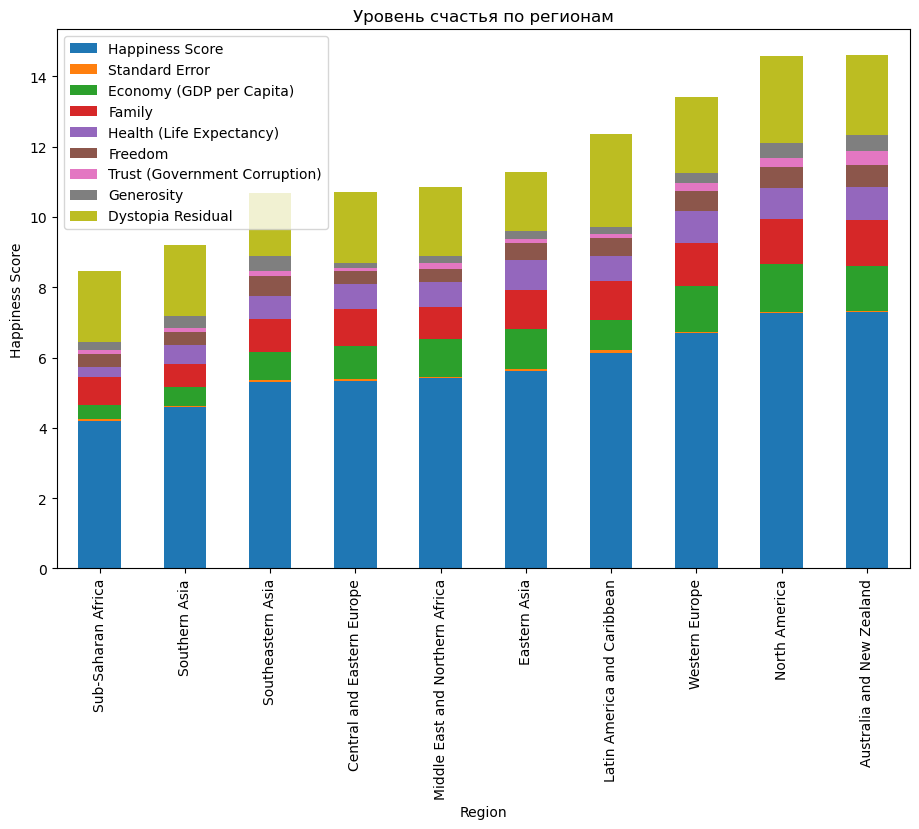

In [127]:
region_group.plot(kind='bar', stacked = True)
plt.ylabel("Happiness Score")
plt.title("Уровень счастья по регионам")
plt.show()

#### Анализ корлляций между показателями

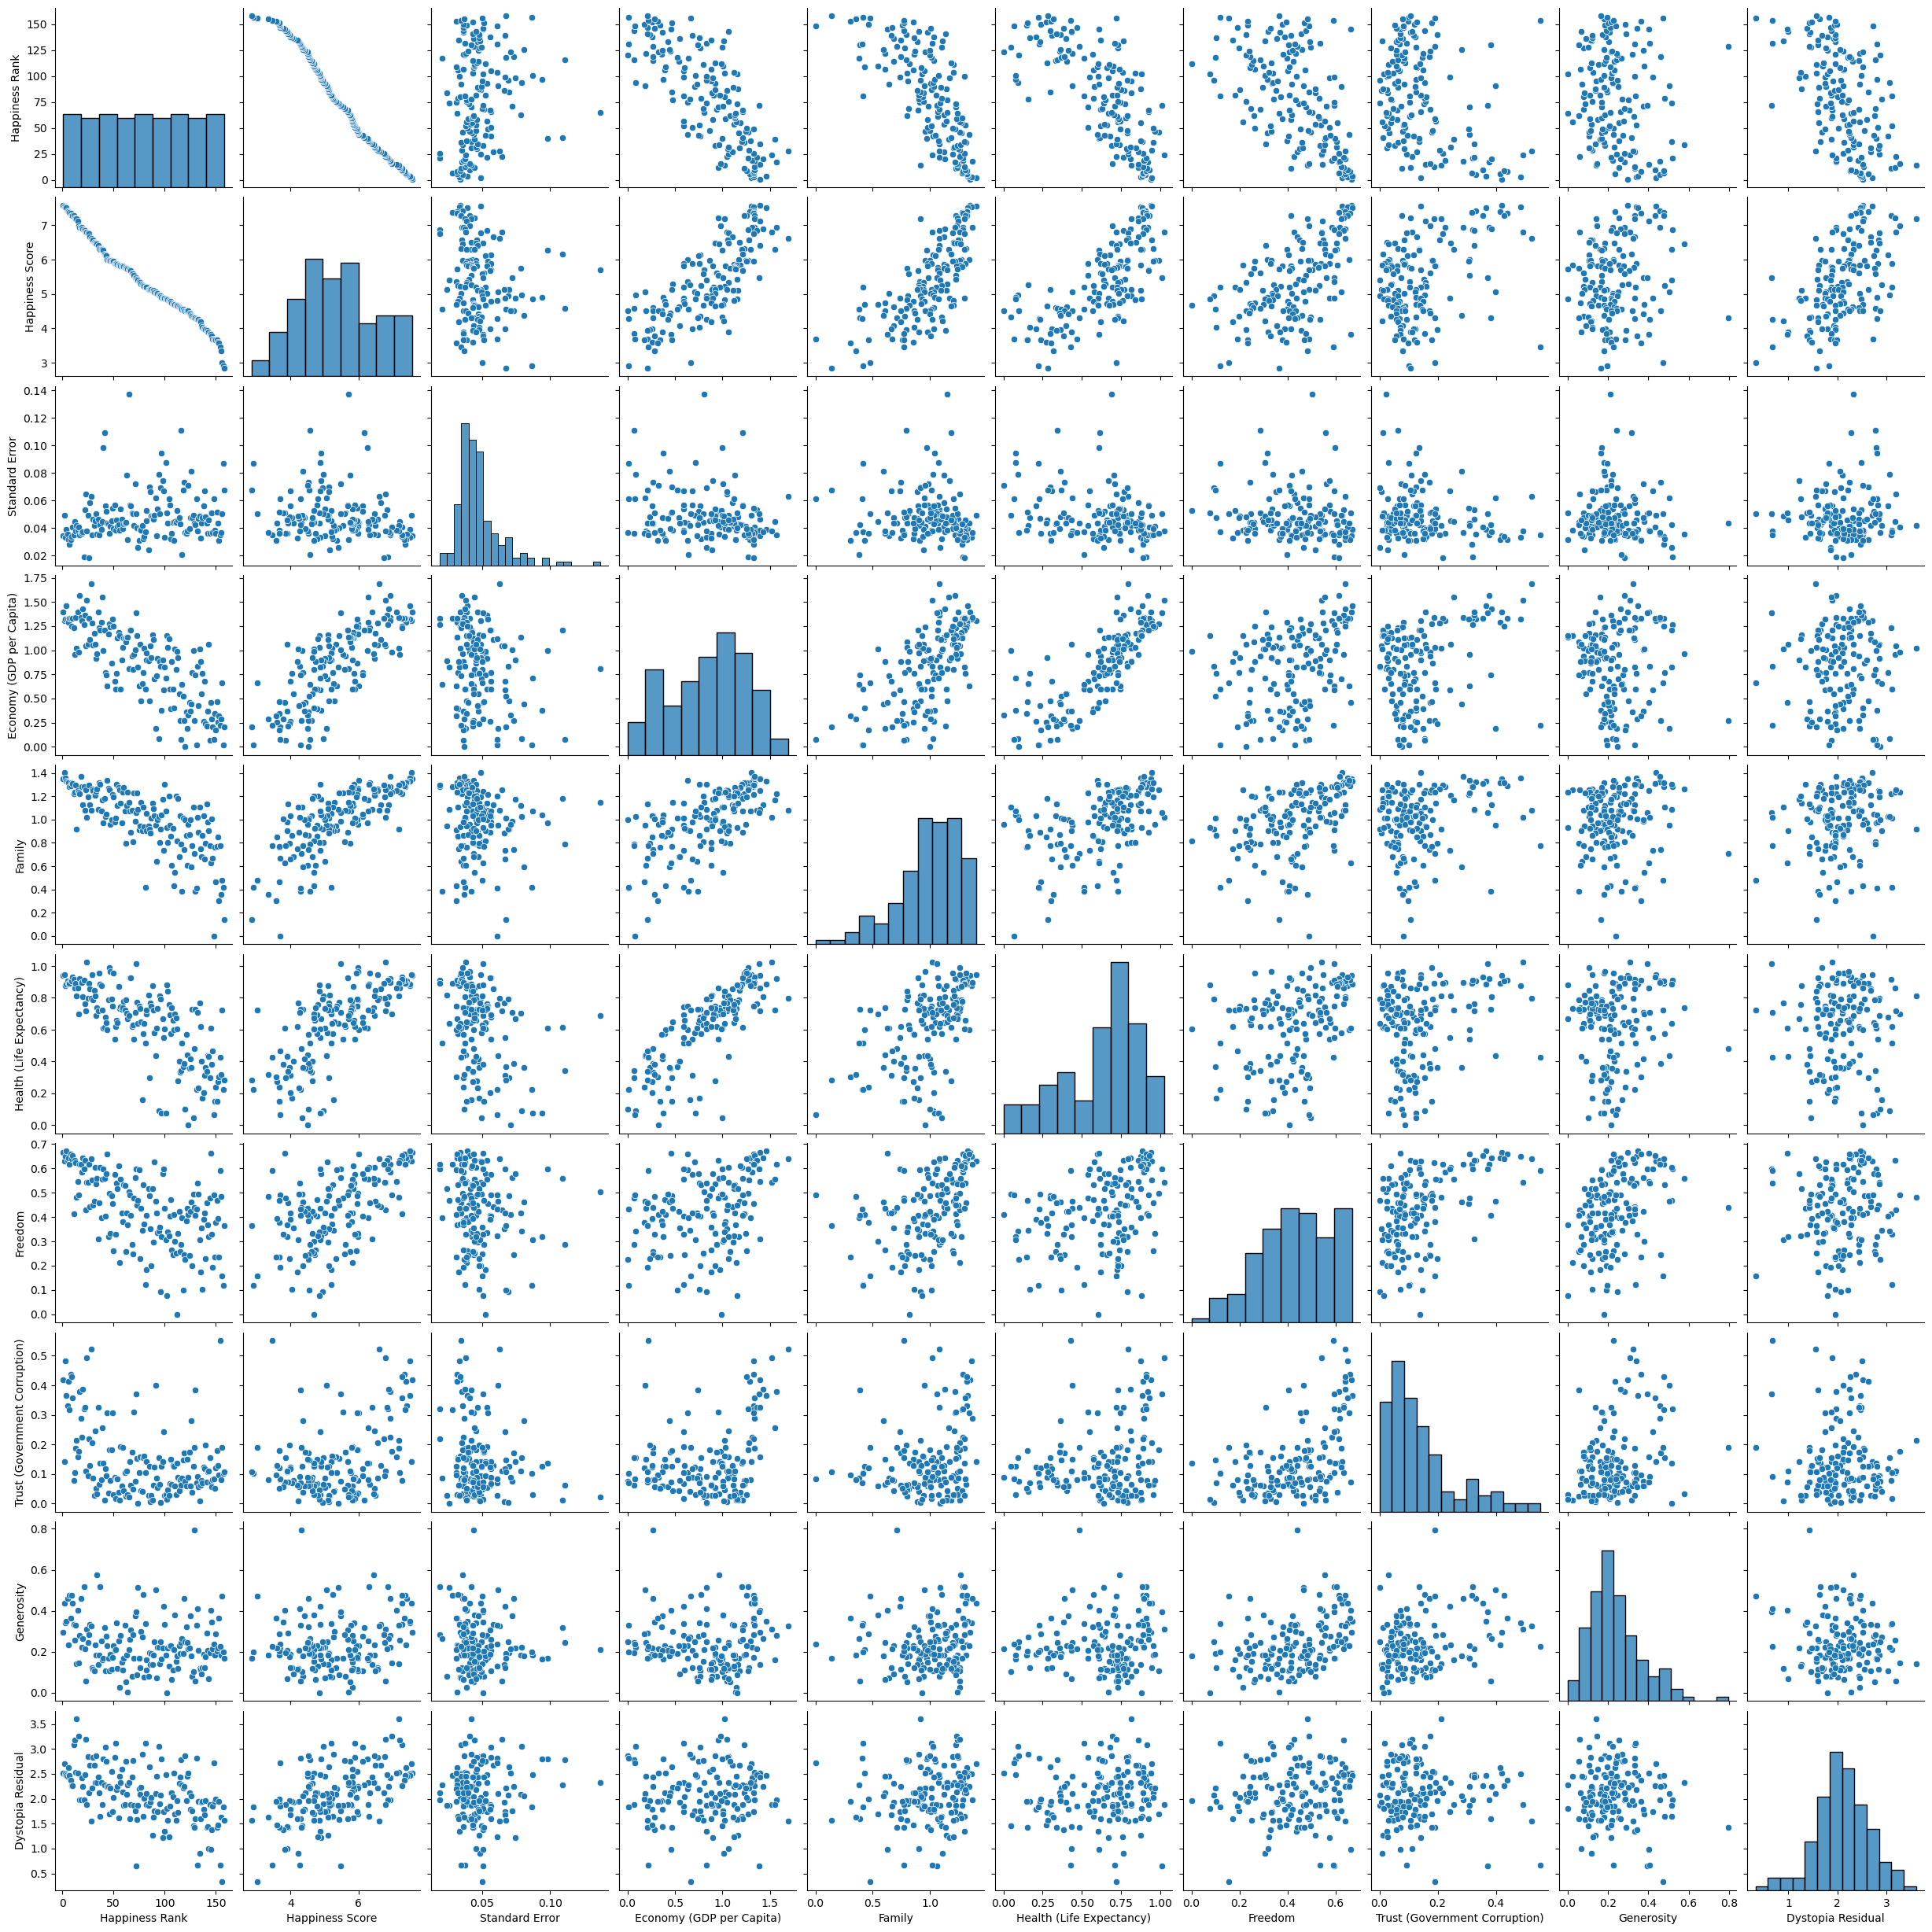

In [83]:
sns.pairplot(df)
plt.show()

Очевидны положительные корелляции скоринга и ввп, семьи, здоровья и свободы.
Наблюдается нелинейная корелляция с уровнем доверия государству.
Проанализируем данные показатели

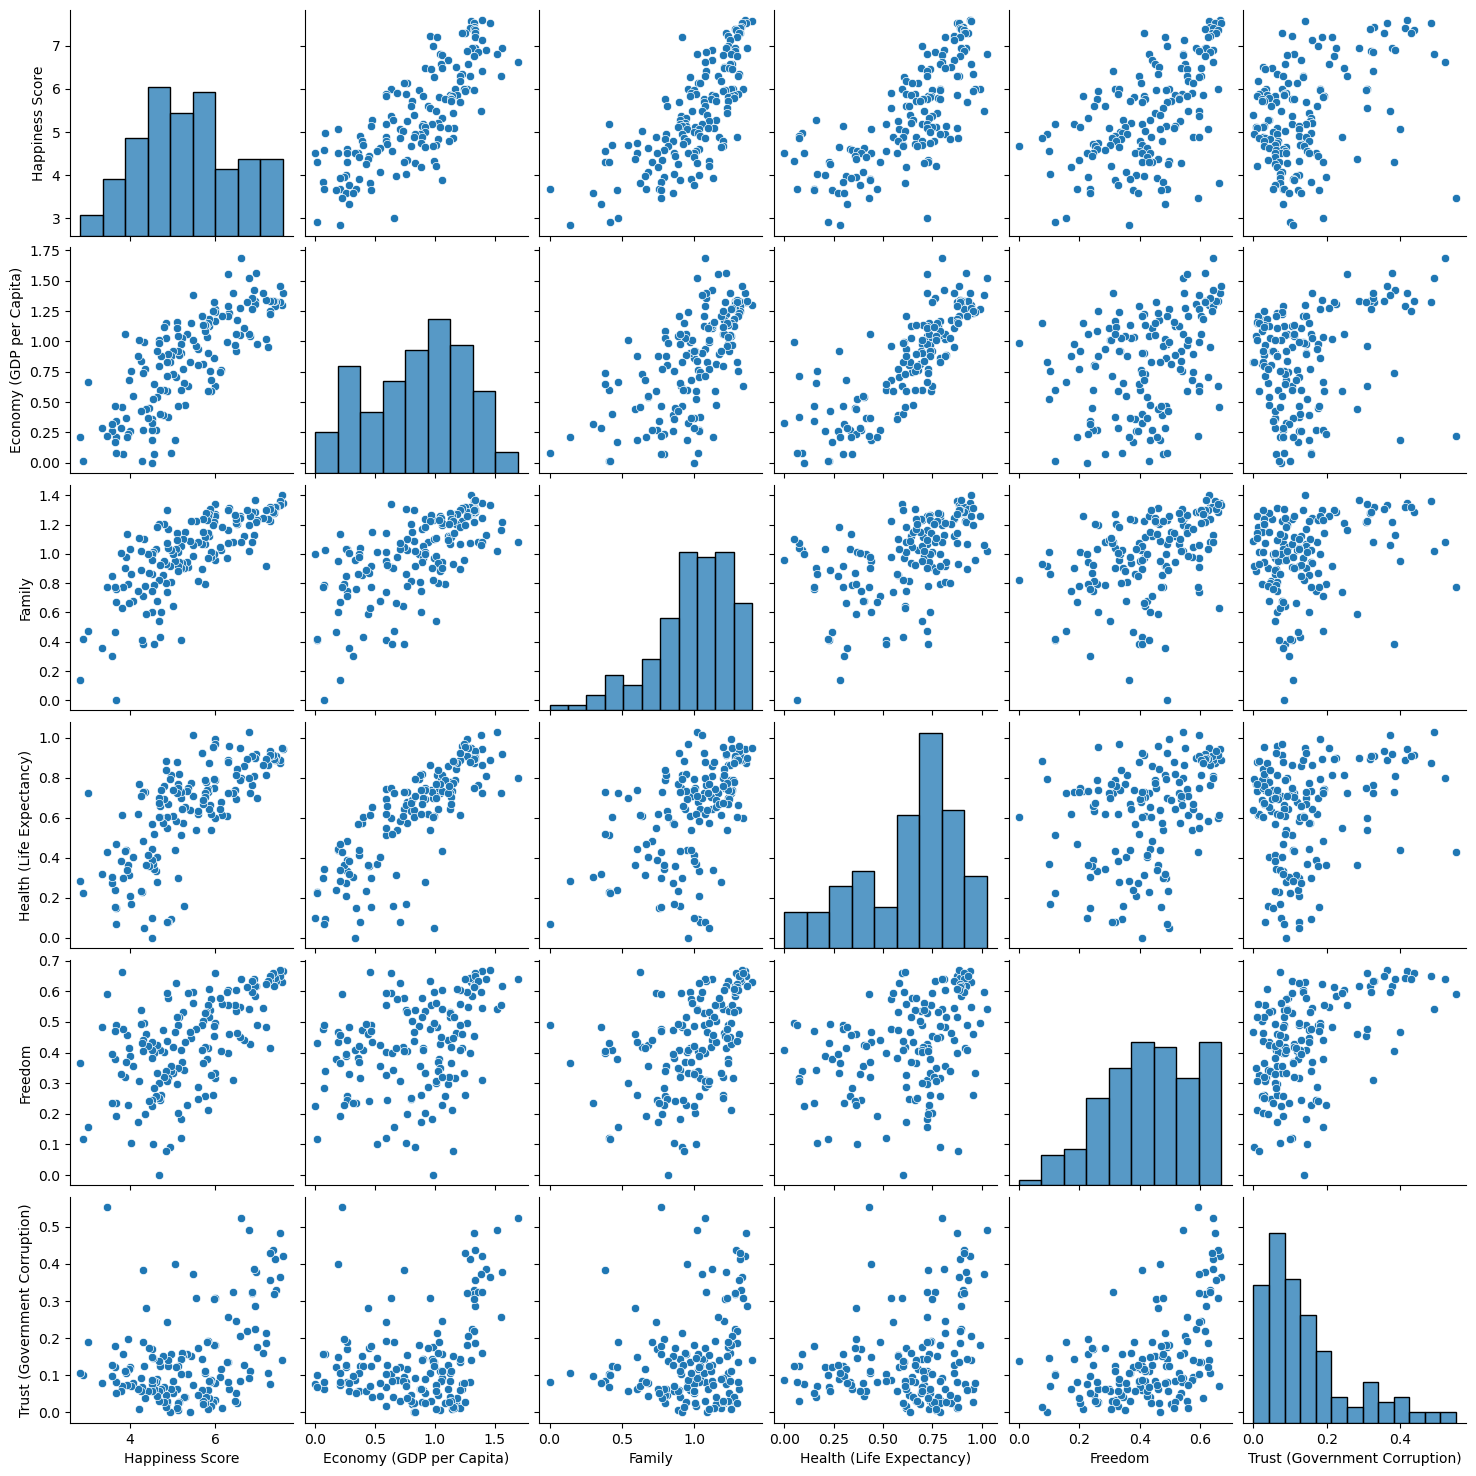

In [112]:
df_short = df.iloc[:, :10].drop(["Happiness Rank", "Standard Error"], axis = 1)
sns.pairplot(df_short)
plt.show()

In [113]:
df_short.describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption)
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675
50%,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220
75%,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910


In [114]:
df_short.corr()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption)
Happiness Score,1.000000,0.780966,0.740605,0.724200,0.568211,0.395199
Economy (GDP per Capita),0.780966,1.000000,0.645299,0.816478,0.370300,0.307885
Family,0.740605,0.645299,1.000000,0.531104,0.441518,0.205605
Health (Life Expectancy),0.724200,0.816478,0.531104,1.000000,0.360477,0.248335
Freedom,0.568211,0.370300,0.441518,0.360477,1.000000,0.493524
Trust (Government Corruption),0.395199,0.307885,0.205605,0.248335,0.493524,1.000000


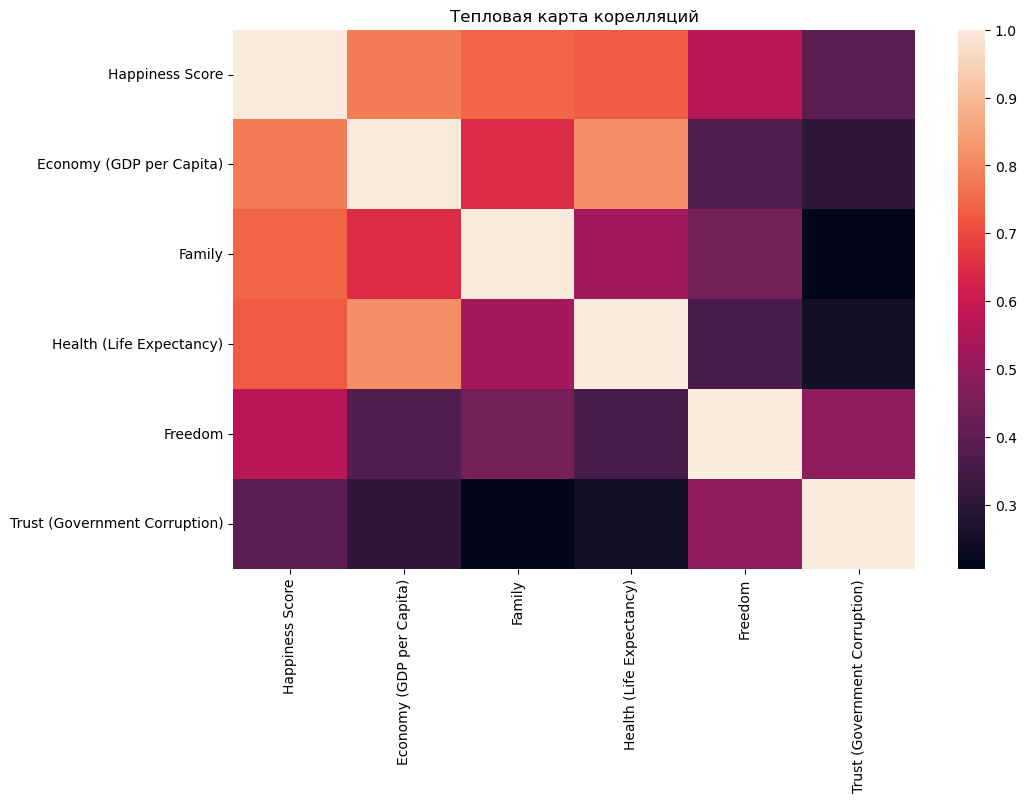

In [115]:
sns.heatmap(df_short.corr())
plt.title("Тепловая карта корелляций")
plt.show()

Наиболее сильная коррелляция - экономика и здоровье, наиболее слабая - семья и уровень доверия государству.

#### Анализ выбросов

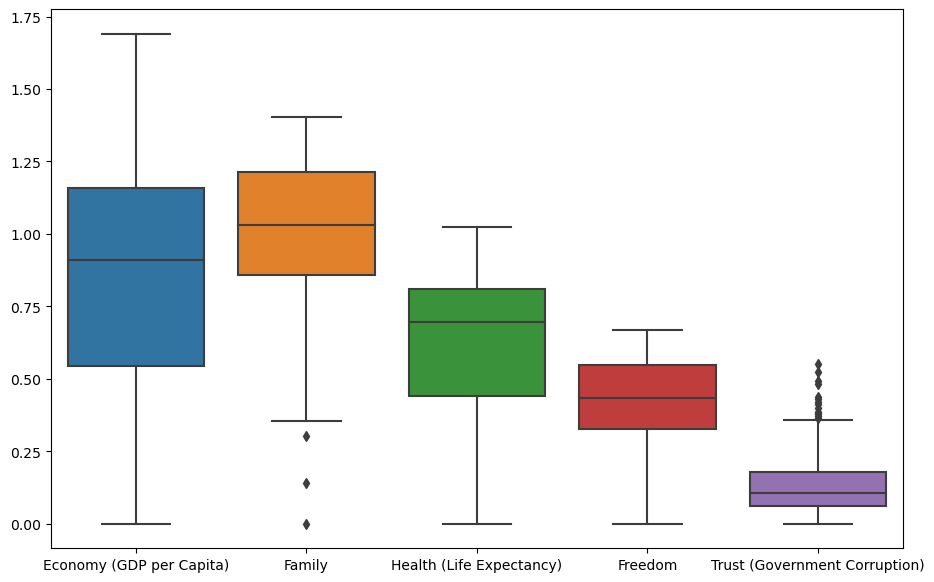

In [152]:
sns.boxplot(data = df_short.drop(["Country", "Region", "Happiness Score"], axis = 1))
plt.show()

Присутствуют выбросы в факторах Семья и Доверие.

#### Анализ наиболее влияющих на оценку факторов

Выбираем топ-10 стран для накопительной диаграммы

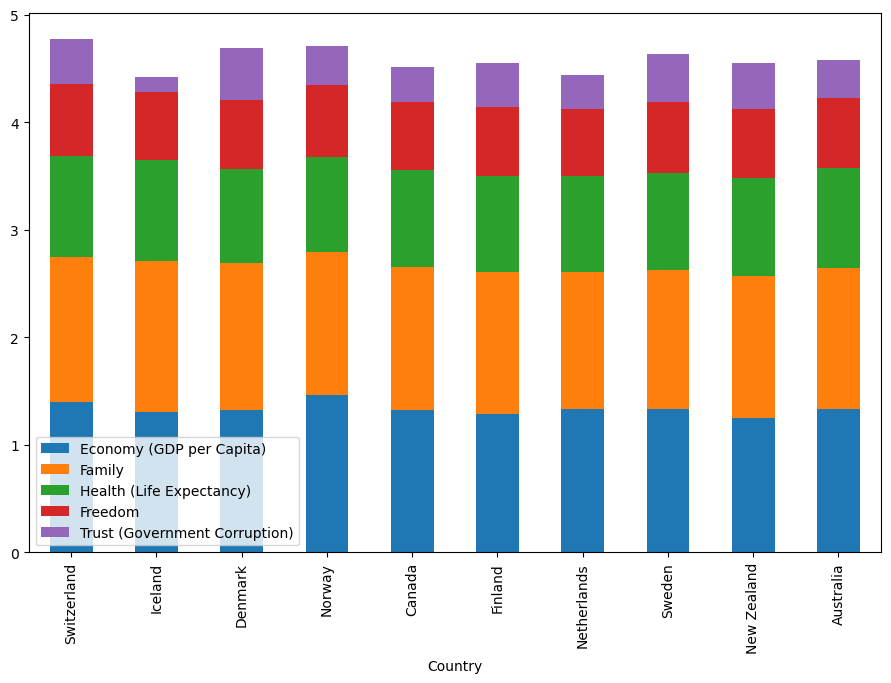

In [118]:
df_short.drop("Happiness Score", axis = 1).head(10).plot(kind = 'bar', x= "Country", stacked = True)
plt.show()

Наиболее сильное влияние оказывает экономика и семья. Выясним наиболее значимы фактор из них, посчитав средние значения

In [155]:
df_mean = df_short.drop(["Country", "Region"], axis = 1).mean()

In [156]:
df_mean

Happiness Score                  5.375734
Economy (GDP per Capita)         0.846137
Family                           0.991046
Health (Life Expectancy)         0.630259
Freedom                          0.428615
Trust (Government Corruption)    0.143422
dtype: float64

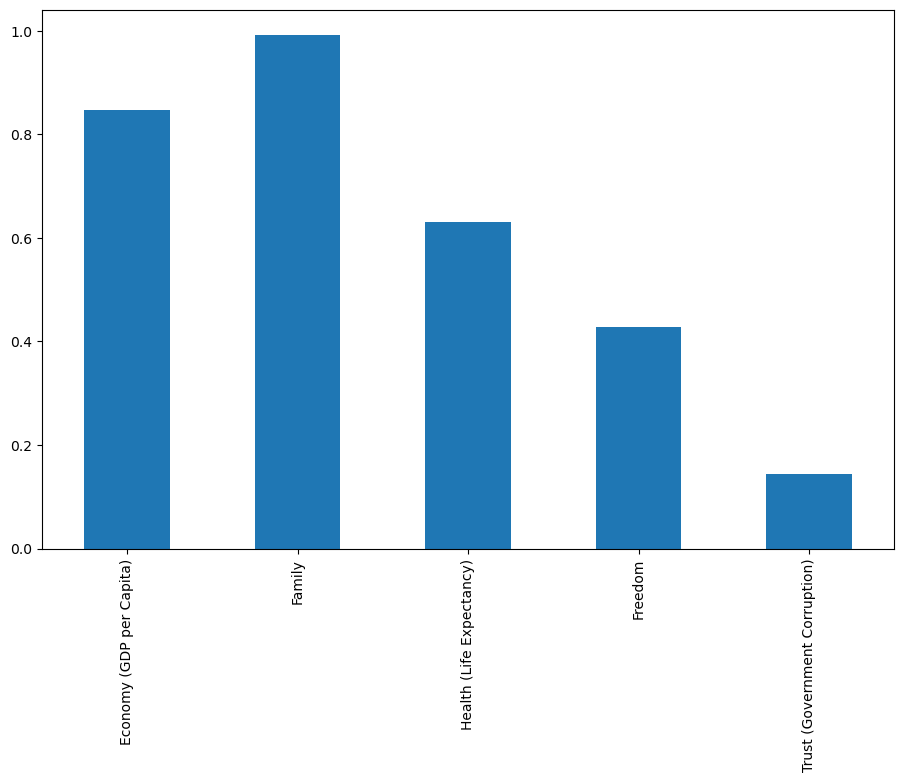

In [157]:
df_mean.iloc[1:].plot(kind="bar")
plt.show()

Наиболее значимым фактором оказывается семья.